In [11]:
from google.colab import files
uploaded = files.upload()


Saving ecommerce_furniture_dataset_2024.csv to ecommerce_furniture_dataset_2024 (1).csv


In [13]:
# --------------------------------------------
# 1. DATA COLLECTION
# --------------------------------------------
import pandas as pd

# Load the dataset
df = pd.read_csv("ecommerce_furniture_dataset_2024.csv")

# Preview the dataset
print("🔹 First 5 rows:")
print(df.head())
print("\n🔹 Dataset shape:", df.shape)


🔹 First 5 rows:
                                        productTitle originalPrice    price  \
0  Dresser For Bedroom With 9 Fabric Drawers Ward...           NaN   $46.79   
1  Outdoor Conversation Set 4 Pieces Patio Furnit...           NaN  $169.72   
2  Desser For Bedroom With 7 Fabric Drawers Organ...         $78.4   $39.46   
3  Modern Accent Boucle Chair,Upholstered Tufted ...           NaN  $111.99   
4  Small Unit Simple Computer Desk Household Wood...        $48.82   $21.37   

   sold        tagText  
0   600  Free shipping  
1     0  Free shipping  
2     7  Free shipping  
3     0  Free shipping  
4     1  Free shipping  

🔹 Dataset shape: (2000, 5)


In [14]:
# --------------------------------------------
# 2. DATA PREPROCESSING
# --------------------------------------------

# Check for missing values
print("🔍 Missing values:\n", df.isnull().sum())

# Remove '$' symbols and convert price columns to numeric
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Drop 'originalPrice' if it has too many NaNs
if 'originalPrice' in df.columns and df['originalPrice'].isnull().sum() > 1000:
    df.drop(['originalPrice'], axis=1, inplace=True)

# Drop missing rows in remaining features
df.dropna(inplace=True)

# Clean and reduce 'tagText' categories
df['tagText'] = df['tagText'].apply(lambda x: x if x in ['Free shipping', '+Shipping: $5.09'] else 'others')

# Encode 'tagText'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['tagText'] = le.fit_transform(df['tagText'])

print("\n✅ Cleaned DataFrame:")
print(df.head())


🔍 Missing values:
 productTitle        0
originalPrice    1513
price               0
sold                0
tagText             3
dtype: int64

✅ Cleaned DataFrame:
                                        productTitle   price  sold  tagText
0  Dresser For Bedroom With 9 Fabric Drawers Ward...   46.79   600        1
1  Outdoor Conversation Set 4 Pieces Patio Furnit...  169.72     0        1
2  Desser For Bedroom With 7 Fabric Drawers Organ...   39.46     7        1
3  Modern Accent Boucle Chair,Upholstered Tufted ...  111.99     0        1
4  Small Unit Simple Computer Desk Household Wood...   21.37     1        1


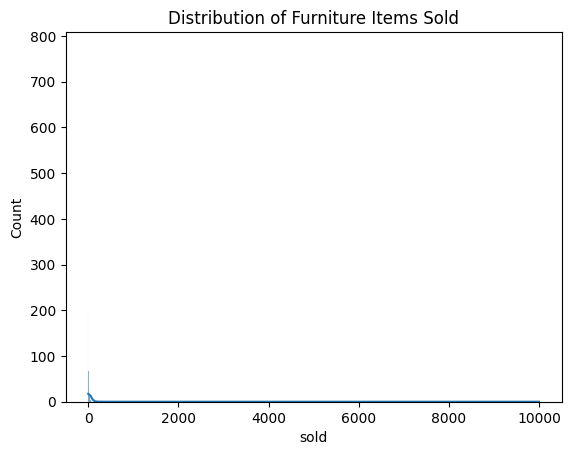

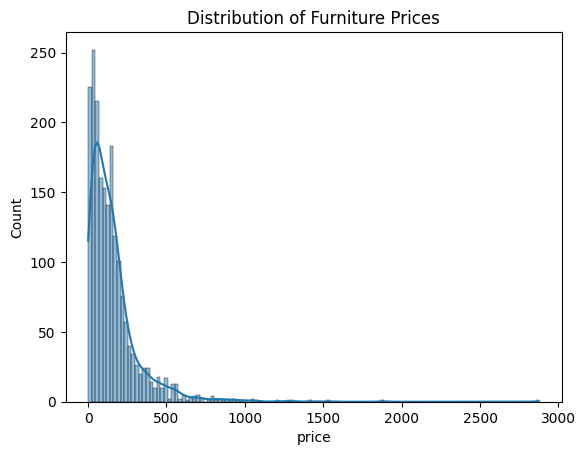

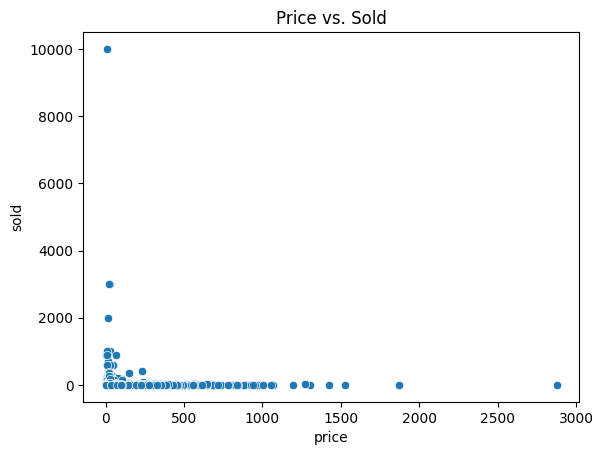

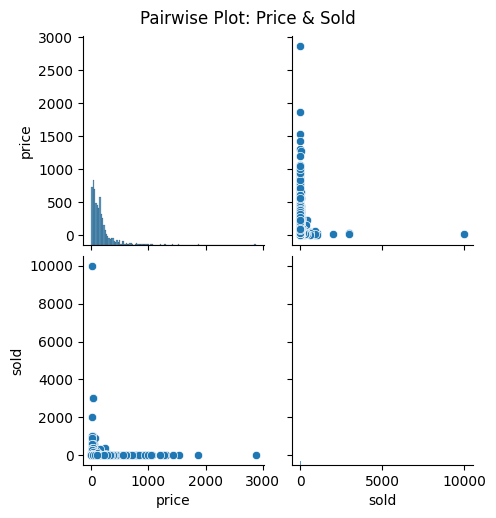

In [15]:
# --------------------------------------------
# 3. EXPLORATORY DATA ANALYSIS (EDA)
# --------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of 'sold'
sns.histplot(df['sold'], kde=True)
plt.title('Distribution of Furniture Items Sold')
plt.show()

# Distribution of 'price'
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Furniture Prices')
plt.show()

# Scatterplot: price vs sold
sns.scatterplot(x='price', y='sold', data=df)
plt.title('Price vs. Sold')
plt.show()

# Pairplot
sns.pairplot(df[['price', 'sold']])
plt.suptitle('Pairwise Plot: Price & Sold', y=1.02)
plt.show()


In [16]:
# --------------------------------------------
# 4. FEATURE ENGINEERING
# --------------------------------------------
from sklearn.feature_extraction.text import TfidfVectorizer

# Apply TF-IDF to productTitle if still exists
if 'productTitle' in df.columns:
    tfidf = TfidfVectorizer(max_features=100)
    product_title_tfidf = tfidf.fit_transform(df['productTitle'])
    tfidf_df = pd.DataFrame(product_title_tfidf.toarray(), columns=tfidf.get_feature_names_out())
    df = pd.concat([df.reset_index(drop=True), tfidf_df], axis=1)
    df.drop('productTitle', axis=1, inplace=True)
else:
    print("⚠️ 'productTitle' column not found — TF-IDF skipped.")


In [17]:
# --------------------------------------------
# 5. MODEL SELECTION & TRAINING
# --------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Split data
X = df.drop('sold', axis=1)
y = df['sold']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [19]:
# --------------------------------------------
# 6. MODEL EVALUATION
# --------------------------------------------
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Random Forest
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Results
print("Linear Regression → MSE: {:.2f}, R²: {:.4f}".format(mse_lr, r2_lr))
print("Random Forest     → MSE: {:.2f}, R²: {:.4f}".format(mse_rf, r2_rf))


Linear Regression → MSE: 25923.96, R²: 0.0243
Random Forest     → MSE: 7498.35, R²: 0.7178
